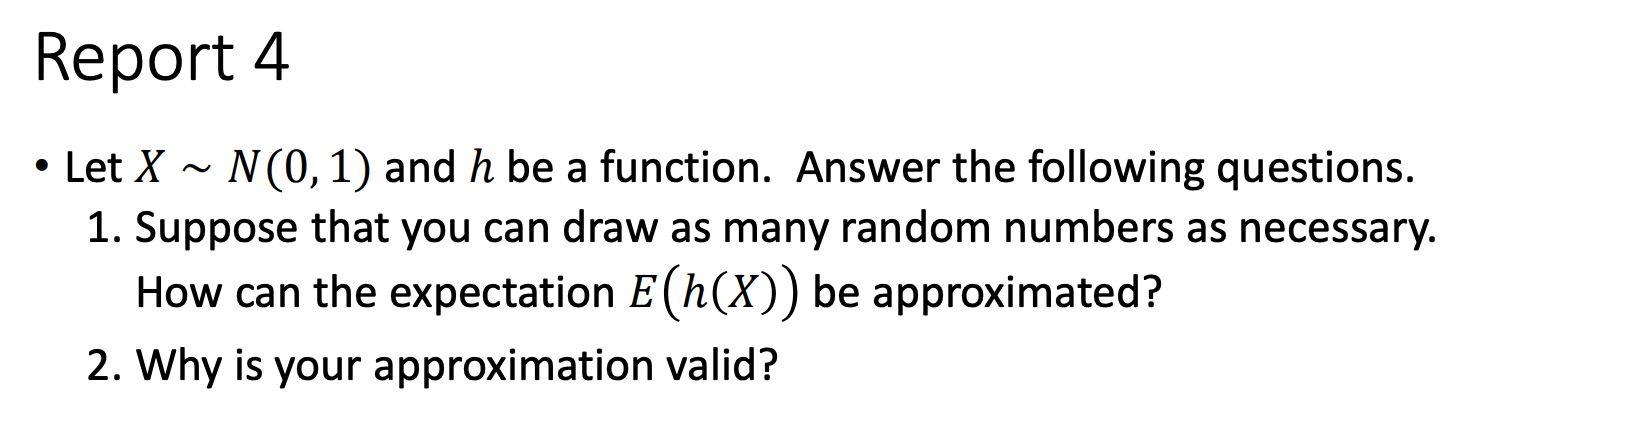

1.
$E(h(X)) \approx  \frac{1}{n}\sum^{n}_{i=1} h(X_i)$  
2.$Y = h(X), Y_1 = h(X_1), ..., Y_n = h(X_n)$とすると，$Y_1,...Y_n$は$Y$と独立同一分布に従う．  
よって大数の法則より，$E(Y) \approx  \frac{1}{n}\sum^{n}_{i=1} Y_i$，すなわち$E(h(X)) \approx  \frac{1}{n}\sum^{n}_{i=1} E(h(X_i))$が成り立つ．

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

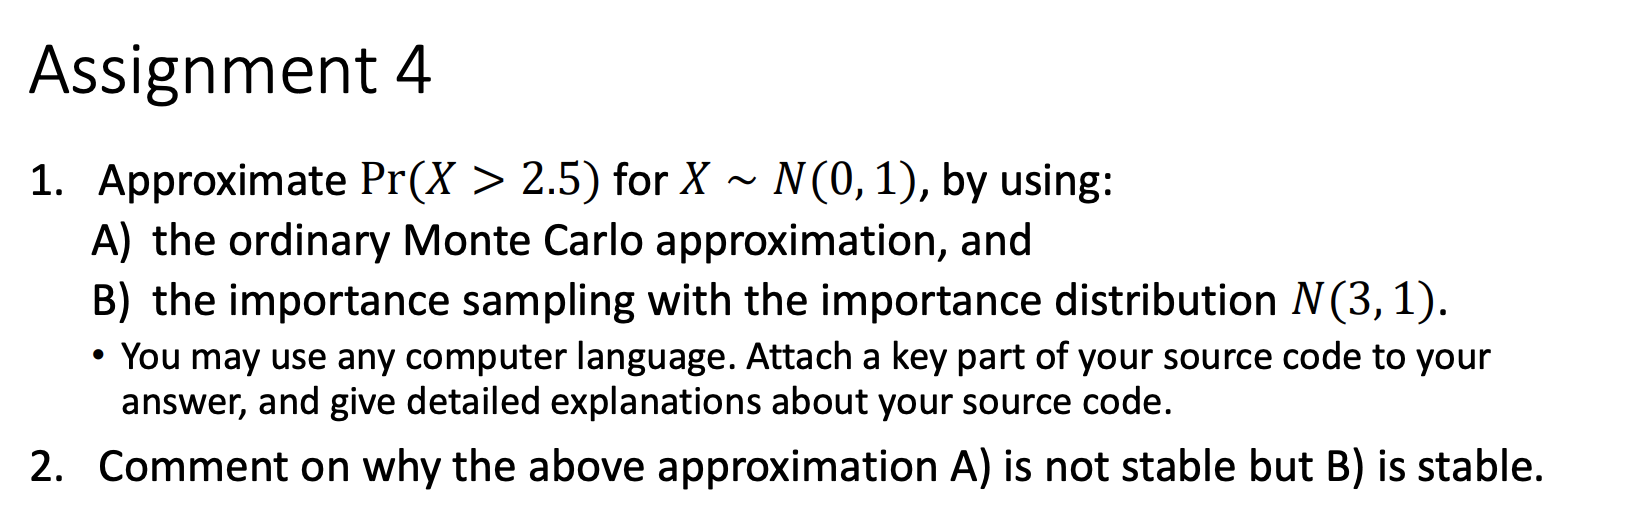

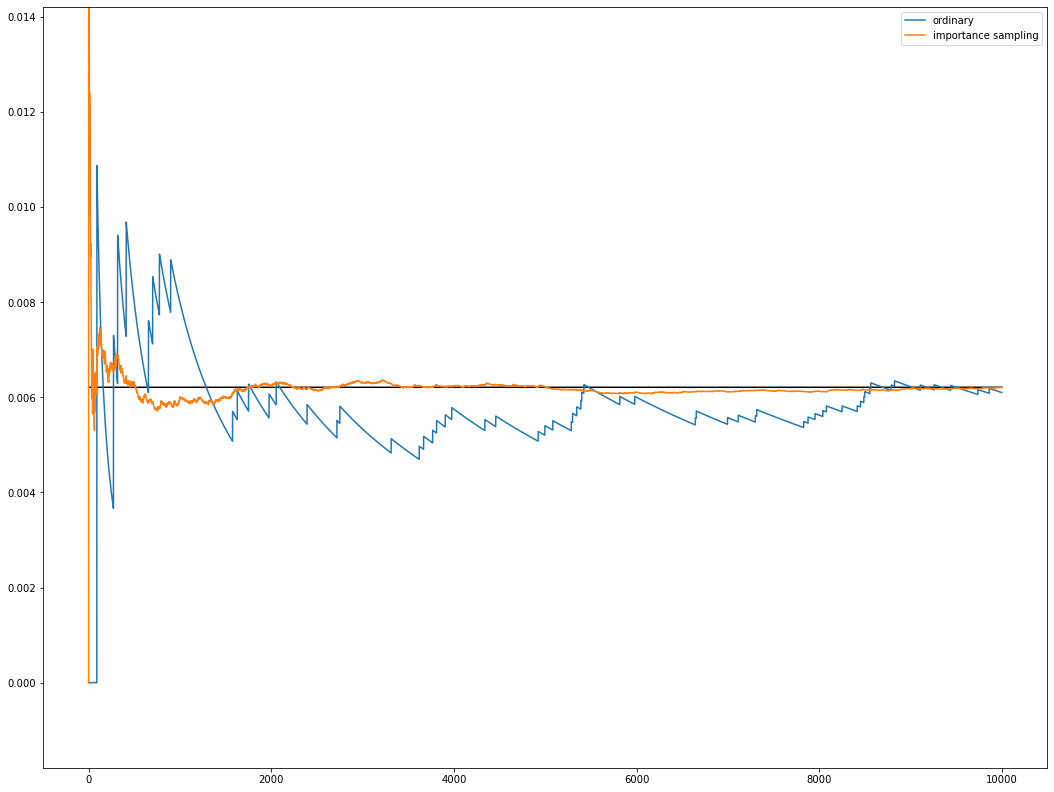

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 標準正規分布N(0,1)から独立な10000サンプルxを取り出す（ordinary）．
# P(X>2.5)を求めるために，x>2.5となるようなサンプルを1，そうでないサンプルを0に変換．
arr1 = np.random.randn(10000)
arr1_ = np.array([1 if x>2.5 else 0 for x in arr1])

# 正規分布N(3,1)から独立な10000サンプルx'を取り出す（importance sampling）．
# P(X>2.5)を求めるために，x'>2.5となるようなサンプルをf(x')/g(x')，そうでないサンプルを0に変換．f(x)=N(0,1), g(x)=N(3,1)
arr2 = np.random.normal(3, 1, 10000)
arr3 = np.array([np.exp(9/2-3*x) if x>2.5 else 0 for x in arr2])

# グラフ描画のために，先頭iサンプルまでの算術平均をi=1から10000まで計算
cumsum1 = np.cumsum(arr1_)
pr1 = np.array([cumsum/(i+1) for i, cumsum in enumerate(cumsum1)])
cumsum3 = np.cumsum(arr3)
pr3 = np.array([cumsum/(i+1) for i, cumsum in enumerate(cumsum3)])

# 描画
num = np.arange(10000)
plt.figure(figsize=(18, 14))
base = [0.0062097]*10000
plt.plot(num, base, color='#000000')
plt.plot(num, pr1, label='ordinary')
plt.plot(num, pr3, label='importance sampling')
plt.ylim([0.0062097-0.008, 0.0062097+0.008])
# plt.grid(True)
plt.legend()
plt.show()

A)では，X>2.5となるようなサンプルがPr(X>2.5)=0.0062097と非常に少ないため，試行回数10000以下では少なすぎて安定しない．  
B)では，サンプリングを行う分布をN(3,1)にすることでP(X'>2.5)=0.51994と条件式を満たすサンプルと満たさないサンプルが同程度出現することが期待できる．これが安定の理由である．ただし，もとの分布からサンプリングする時と同じ確率になるよう$f(x)/g(x)$により補正を行なっている．